## Final Code for DTW integration with DL model

In [2]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf

from datetime import datetime

In [3]:
# Define the stock symbol for S&P 500
symbol_sp500 = '^GSPC'

# Define start and end dates
start_date_sp500 = '2000-01-01'
end_date_sp500 = datetime.now()

# Fetch historical data for S&P 500 from Yahoo Finance
df2 = yf.download(symbol_sp500, start=start_date_sp500, end=end_date_sp500)

# Display the DataFrame
print(df2)


[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
...                 ...          ...          ...          ...          ...   
2023-11-28  4545.549805  4568.140137  4540.509766  4554.890137  4554.890137   
2023-11-29  4571.839844  4587.640137  4547.149902  4550.580078  4550.580078   
2023-11-30  4554.870117  4569.890137  4537.240234  4567.799805  4567.799805   
2023-12-01  4559.430176  4599.390137  4554.709961  4594.629883

## Method (OHLC)

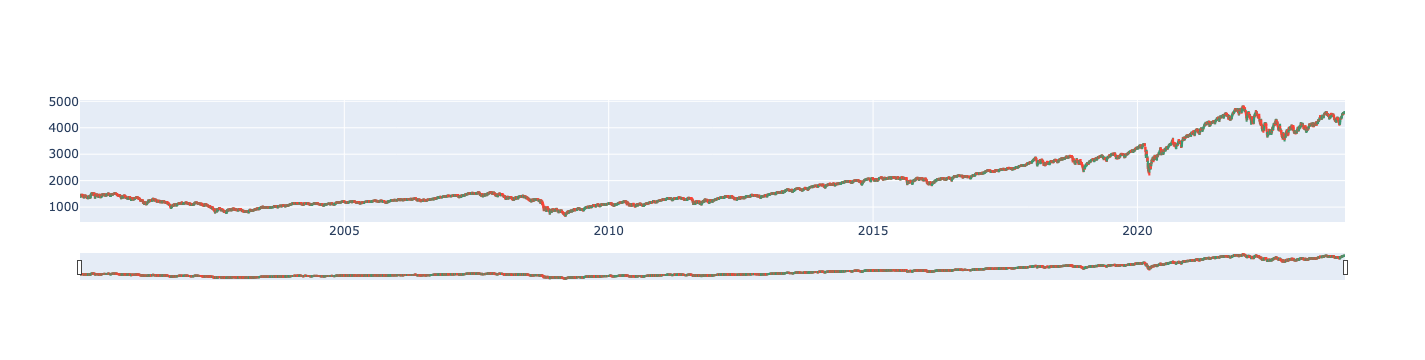

In [4]:
fig = go.Figure(data=[go.Candlestick(x=df2.index,
                open=df2['Open'],
                high=df2['High'],
                low=df2['Low'],
                close=df2['Close'])])

fig.show()

## Training/testing spliting
### Training/Testing ratio: 8:2

In [5]:
data = df2.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len


4816

## Data Preporcessing

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.18900104],
       [0.17545746],
       [0.17611036],
       ...,
       [0.94447607],
       [0.95098818],
       [0.94495665]])

In [7]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))    # data reshaping

[array([0.18900104, 0.17545746, 0.17611036, 0.17643559, 0.18566368,
       0.1895787 , 0.1849574 , 0.18342584, 0.18765641, 0.19141123,
       0.18898163, 0.1891661 , 0.18665881, 0.18563699, 0.17596959,
       0.17803268, 0.17659093, 0.17524873, 0.1659284 , 0.17425357,
       0.17785065, 0.1778118 , 0.18165886, 0.18151323, 0.18148168,
       0.18572436, 0.17844043, 0.17968314, 0.17247204, 0.17315648,
       0.17609581, 0.17260554, 0.17274874, 0.16251336, 0.1639891 ,
       0.16605702, 0.16429492, 0.15942358, 0.16298911, 0.16744781,
       0.17054728, 0.17117108, 0.17782395, 0.17348175, 0.16482646,
       0.16751575, 0.1760084 , 0.17440162, 0.17162253, 0.16568326,
       0.17369048, 0.18978986, 0.19124616, 0.18934327, 0.19838204,
       0.20002524, 0.20650819, 0.20653489, 0.20566111, 0.20174609])]
[0.20193784616088406]

[array([0.18900104, 0.17545746, 0.17611036, 0.17643559, 0.18566368,
       0.1895787 , 0.1849574 , 0.18342584, 0.18765641, 0.19141123,
       0.18898163, 0.1891661 , 0.18

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10


2023-12-05 13:22:20.501894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 13:22:20.502781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 13:22:20.503253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4756/4756 [==============================] - 50s 10ms/step - loss: 2.3720e-04
Epoch 2/10
4756/4756 [==============================] - 50s 11ms/step - loss: 1.1361e-04
Epoch 3/10
4756/4756 [==============================] - 52s 11ms/step - loss: 8.8044e-05
Epoch 4/10
4756/4756 [==============================] - 53s 11ms/step - loss: 7.1165e-05
Epoch 5/10
4756/4756 [==============================] - 53s 11ms/step - loss: 5.4482e-05
Epoch 6/10
4756/4756 [==============================] - 52s 11ms/step - loss: 5.1323e-05
Epoch 7/10
4756/4756 [==============================] - 52s 11ms/step - loss: 5.1811e-05
Epoch 8/10
4756/4756 [==============================] - 51s 11ms/step - loss: 4.5554e-05
Epoch 9/10
4756/4756 [==============================] - 51s 11ms/step - loss: 4.4798e-05
Epoch 10/10
4756/4756 [==============================] - 51s 11ms/step - loss: 4.2346e-05


In [9]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2023-12-05 13:30:54.125935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 13:30:54.128477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 13:30:54.130103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 [==============================] - 1s 16ms/step


167.3607728132704

In [10]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/var/folders/1g/0mj97r555d15d54dx2257j7m0000gn/T/ipykernel_6426/2657761684.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



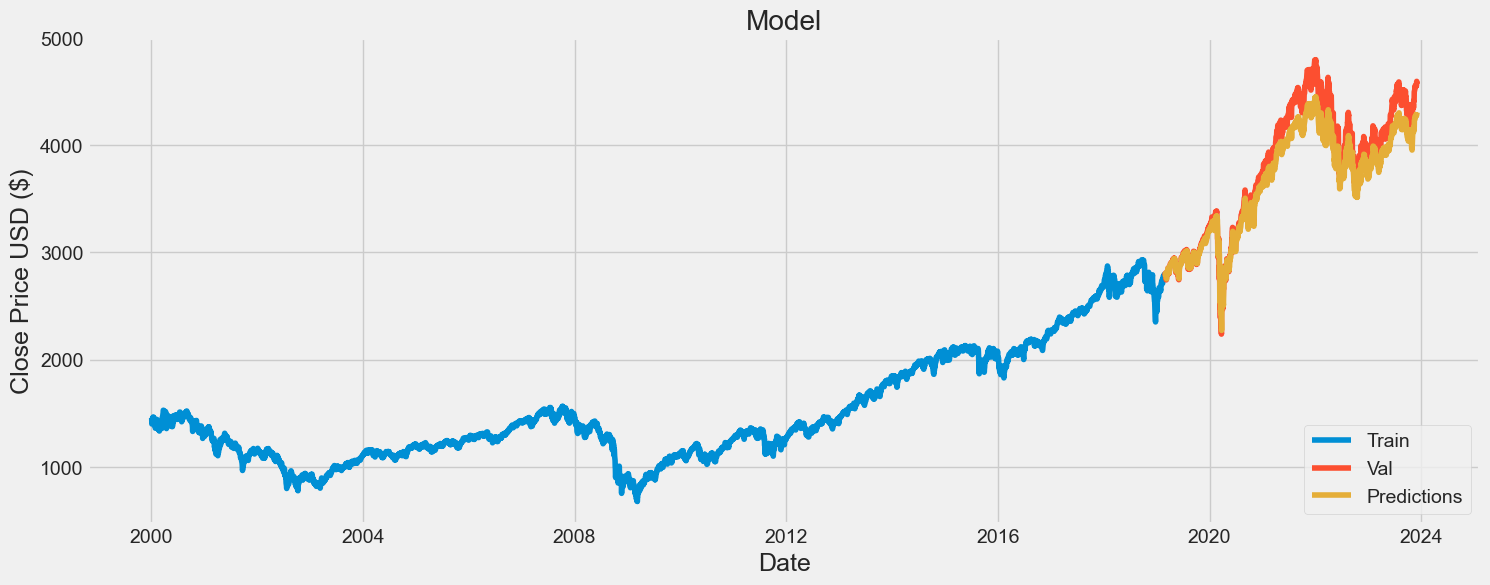

In [11]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [12]:
valid

,Close,Predictions
Date,,
2019-02-26,2793.899902,2799.516113
2019-02-27,2792.379883,2798.671143
2019-02-28,2784.489990,2797.382324
2019-03-01,2803.689941,2790.524170
2019-03-04,2792.810059,2806.625977
...,...,...
2023-11-28,4554.890137,4274.754395
2023-11-29,4550.580078,4278.490723
2023-11-30,4567.799805,4275.181641


In [13]:
# Reset the index in the 'valid' DataFrame
valid.reset_index(inplace=True);
valid['Date'] = pd.to_datetime(valid['Date']).copy()

/var/folders/1g/0mj97r555d15d54dx2257j7m0000gn/T/ipykernel_6426/2336435200.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import numba as nb

pio.renderers.default='svg'

TS_LENGTH = 20  # How long the dynamic time-warping comparison is
PLOT_FROM = '01-01-01'  # Where to plot the comparison from
DTW_THRESHOLD = 11.53

@nb.jit(nopython = True)
def z_scale(ts: np.array) -> np.array:
    return (ts - np.mean(ts))/np.std(ts)


@nb.jit(nopython=True)
def get_dtw_score(ts1: np.ndarray, ts2: np.ndarray) -> float:
    '''
    Calculate the dynamic time warping cost between two time series
    '''
    C = np.full(shape=(ts1.shape[0] + 1, ts2.shape[0] + 1), fill_value=np.inf)
    C[0, 0] = 0

    for i in range(1, ts1.shape[0] + 1):
        for j in range(1, ts2.shape[0] + 1):
            dist = abs(ts1[i-1] - ts2[j-1])
            prev_min = min(C[i-1, j], C[i, j-1], C[i-1, j-1])
            C[i, j] = dist + prev_min

    return C[-1, -1]

# Explicitly define the type signature for rolling_score_inner_loop
@nb.jit(nopython=True)
def rolling_score_inner_loop(ts1: np.ndarray, ts2: np.ndarray, length: int) -> np.ndarray:
    scores = np.full(ts1.shape, np.nan)

    for n in range(length, ts1.shape[0]):
        scores[n] = get_dtw_score(
            ts1=z_scale(ts1[n - length:n]),
            ts2=z_scale(ts2[n - length:n]),
        )

    return scores

# Explicitly define the type signature for rolling_score
@nb.jit(nopython=True)
def rolling_score(ts1: np.array, ts2: np.array, length: int) -> np.array:
    scores = np.full(ts1.shape, np.nan)

    for n in range(length, ts1.shape[0]):
        ts1_window = z_scale(ts1[n - length:n] + 1e-8)
        ts2_window = z_scale(ts2[n - length:n] + 1e-8)
        score = get_dtw_score(ts1_window, ts2_window)
        scores[n] = score

    return scores


In [15]:
# Extract necessary columns from the 'valid' DataFrame
dtw_frame = valid[['Date', 'Close', 'Predictions']].copy()

# Calculate DTW scores and add to the 'dtw_frame' DataFrame
dtw_frame['DTW_score'] = rolling_score(
    ts1=dtw_frame['Predictions'].values.astype(np.float64),
    ts2=dtw_frame['Close'].values.astype(np.float64),
    length=TS_LENGTH,
)

# Display the 'dtw_frame'
print(dtw_frame.tail())

           Date        Close  Predictions  DTW_score
1198 2023-11-28  4554.890137  4274.754395   2.545879
1199 2023-11-29  4550.580078  4278.490723   2.700243
1200 2023-11-30  4567.799805  4275.181641   2.738193
1201 2023-12-01  4594.629883  4287.723633   3.332265
1202 2023-12-04  4569.779785  4305.814453   2.846753


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



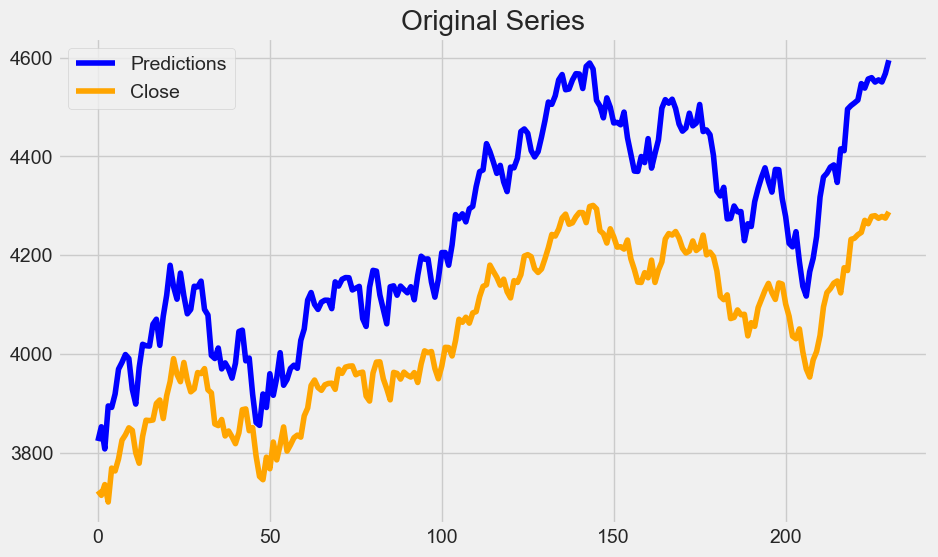

--------------------------------------------------
Minimum Distance: 25061.9384765625	Normalized Distance: 54.24662007913961


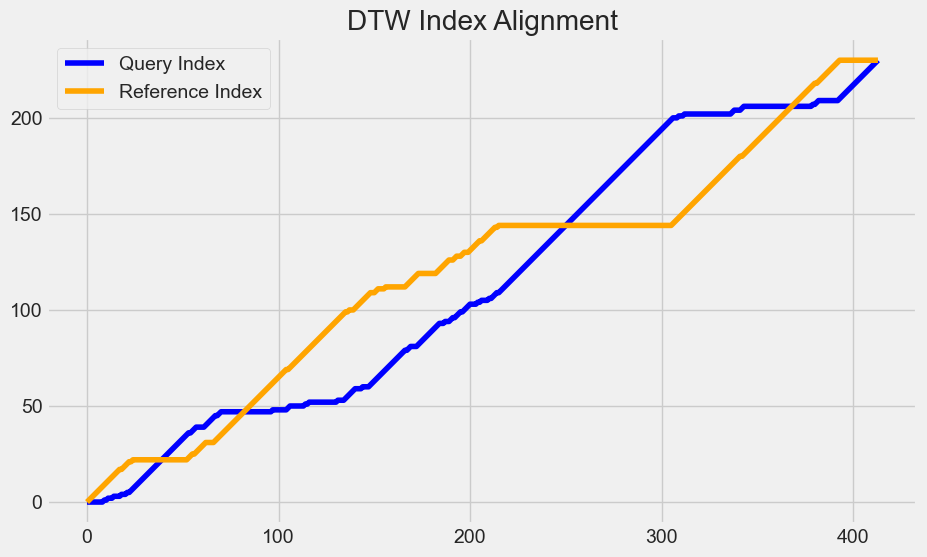

--------------------------------------------------


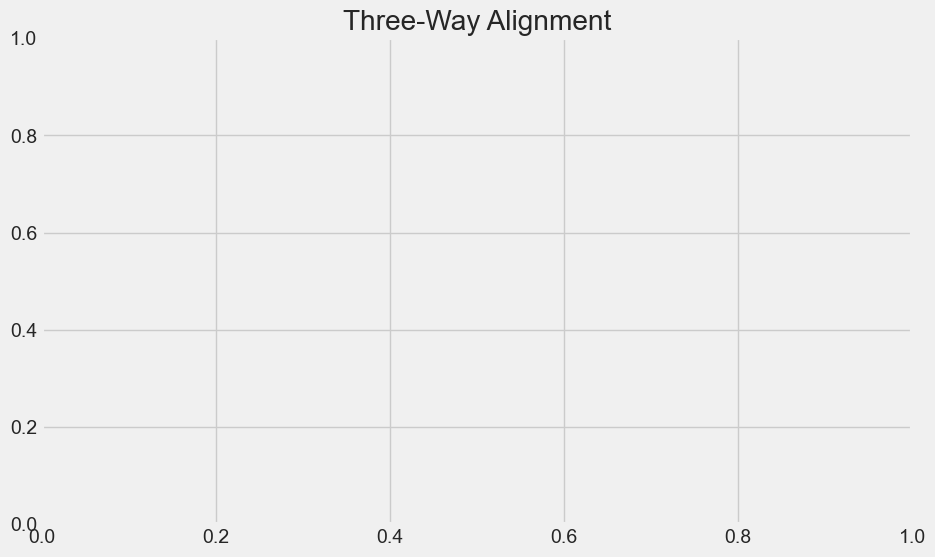

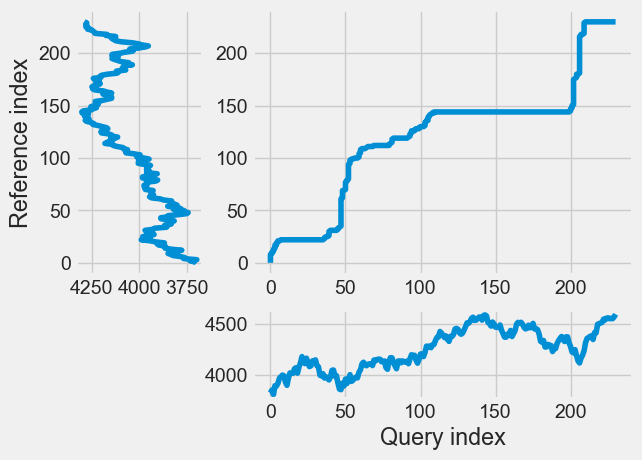

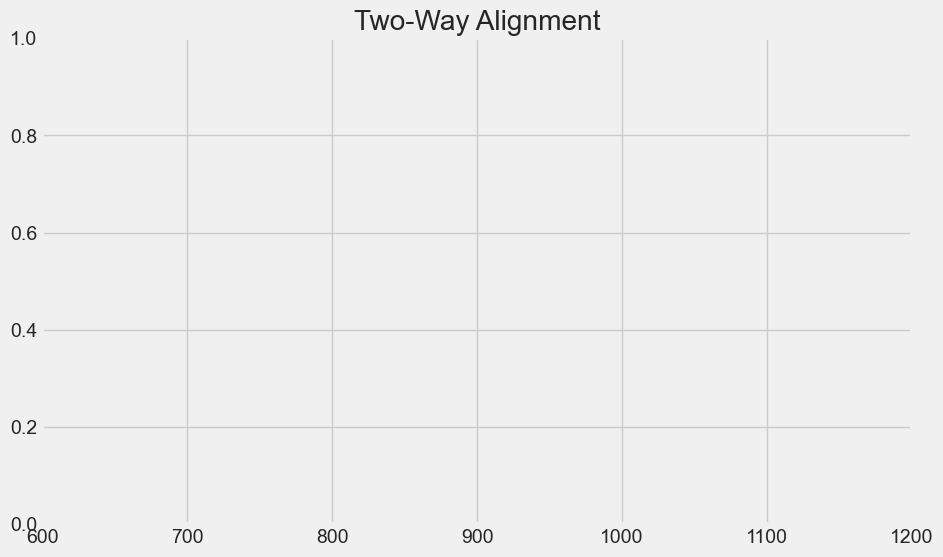

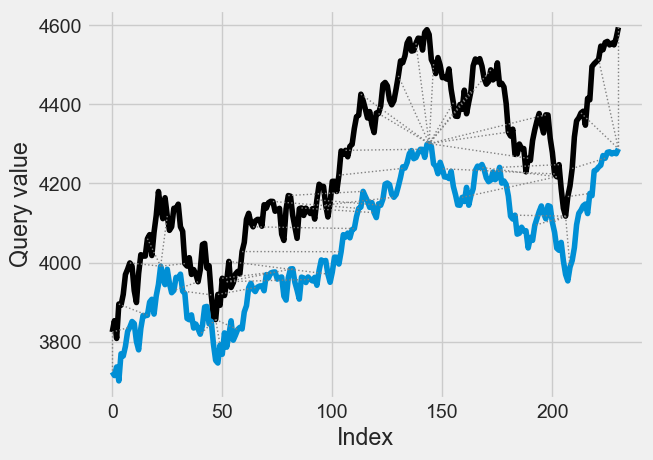

AttributeError: Line2D.set() got an unexpected keyword argument 'xlim'

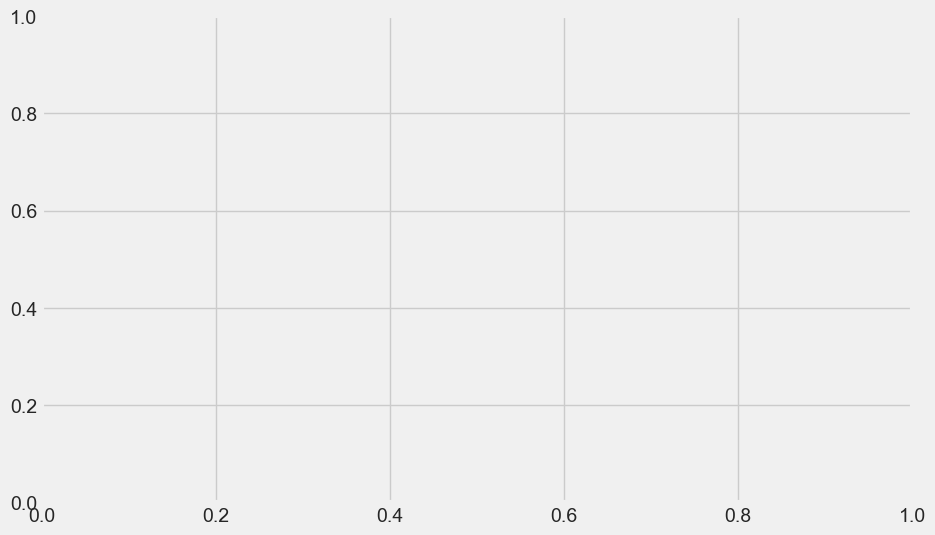

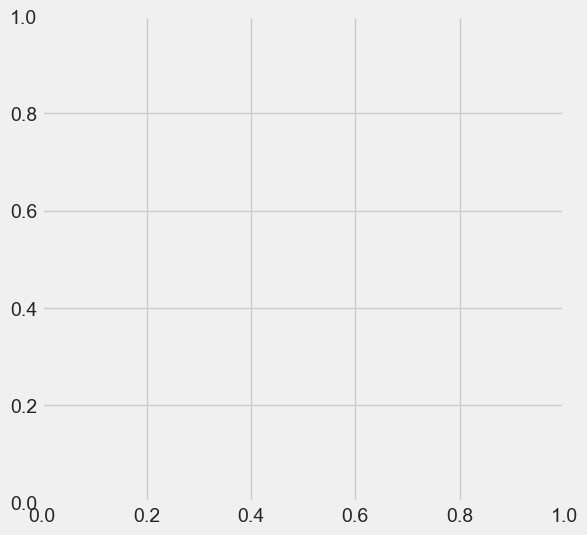

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtw import *

def get_dtw(query, reference, zoom_start=600, zoom_end=1200, verbose=True):
    # Plot original series
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(query, label='Predictions', color='blue')
    ax.plot(reference, label='Close', color='orange')
    ax.legend()
    ax.set_title('Original Series')
    plt.show()

    print('-'*50)

    # Calculate and plot DTW
    al = dtw(query, reference, keep_internals=True)
    print(f'Minimum Distance: {al.distance}\tNormalized Distance: {al.normalizedDistance}')

    # Plot Query and Reference Indices
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(al.index1, label='Query Index', color='blue')
    ax.plot(al.index2, label='Reference Index', color='orange')
    ax.legend()
    ax.set_title('DTW Index Alignment')
    plt.show()

    print('-'*50)

    # Plot Three-Way Alignment
    fig, ax = plt.subplots(figsize=(10, 6))
    al.plot(type='threeway', axis=ax)
    ax.set_title('Three-Way Alignment')
    plt.show()

    # Plot Two-Way Alignment with Zoom
    fig, ax = plt.subplots(figsize=(10, 6))
    al.plot(type='twoway', xts=query.reset_index(drop=True), yts=reference.reset_index(drop=True))
    ax.set_title('Two-Way Alignment')
    ax.set_xlim(zoom_start, zoom_end)
    plt.show()

    # Plot Alignment with Zoom
    fig, ax = plt.subplots(figsize=(10, 6))
    al.plot(type='alignment', xlim=(zoom_start, zoom_end))
    ax.set_title('Alignment Zoomed In')
    plt.show()

    print('='*50)

# Assuming 'dtw_frame' DataFrame with 'Date', 'Close', 'Predictions', and 'DTW_score' columns
start_date = '2023-01-01'
end_date = '2023-12-01'

filtered_dtw_frame = dtw_frame[(dtw_frame['Date'] >= start_date) & (dtw_frame['Date'] <= end_date)].reset_index(drop=True)

get_dtw(filtered_dtw_frame['Close'], filtered_dtw_frame['Predictions'])


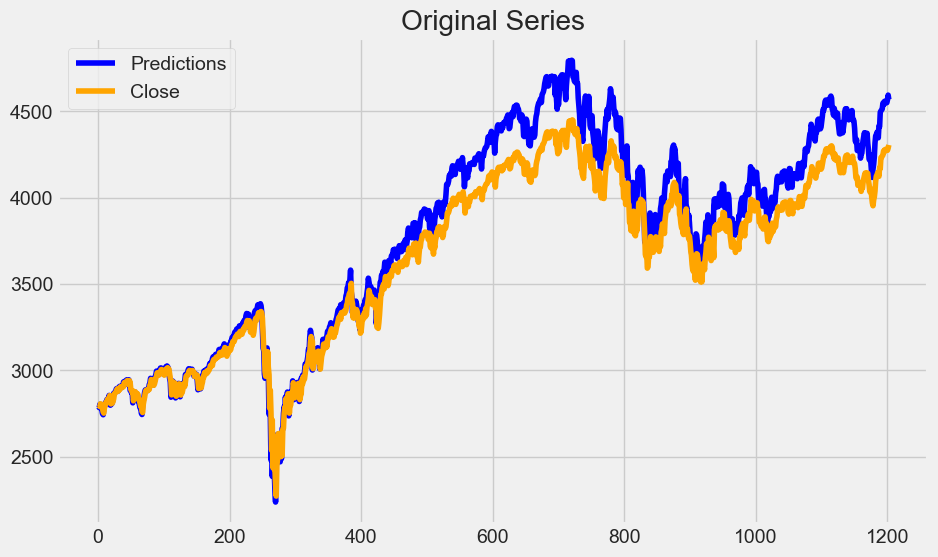

--------------------------------------------------
Minimum Distance: 71437.16967773438	Normalized Distance: 29.69125921767846


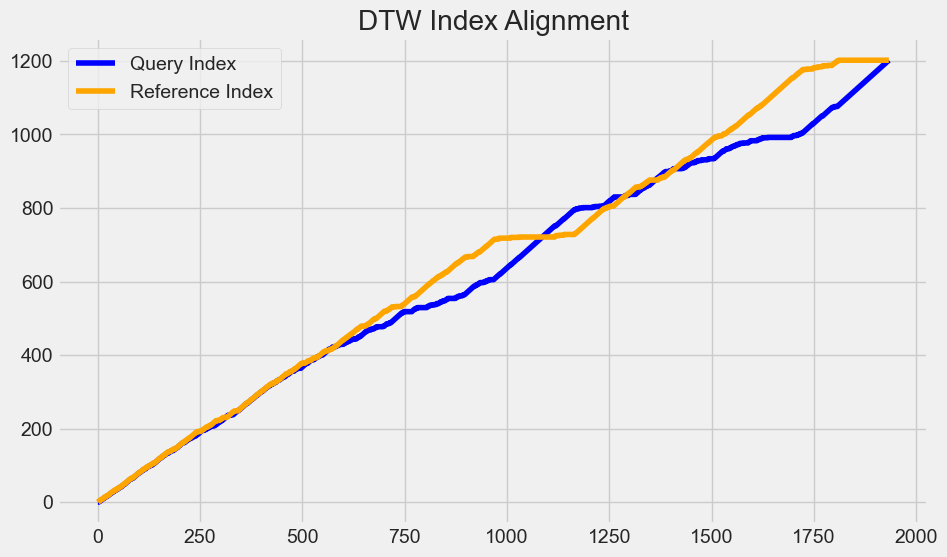

--------------------------------------------------


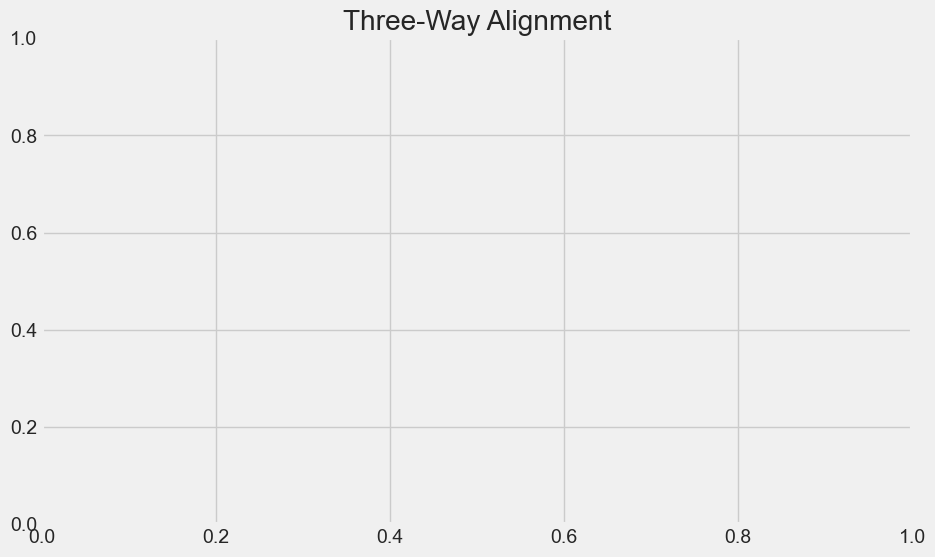

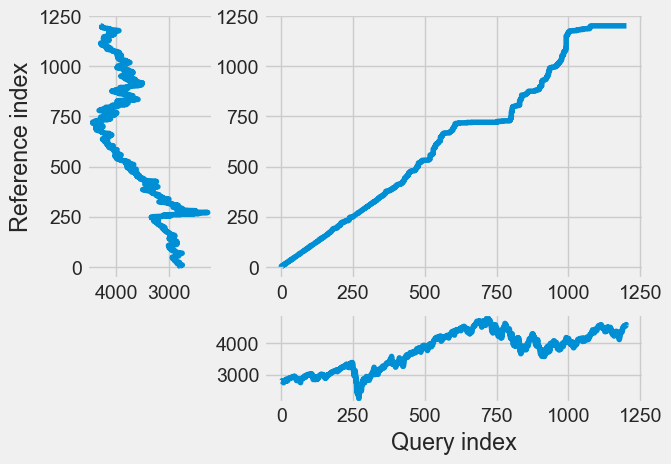

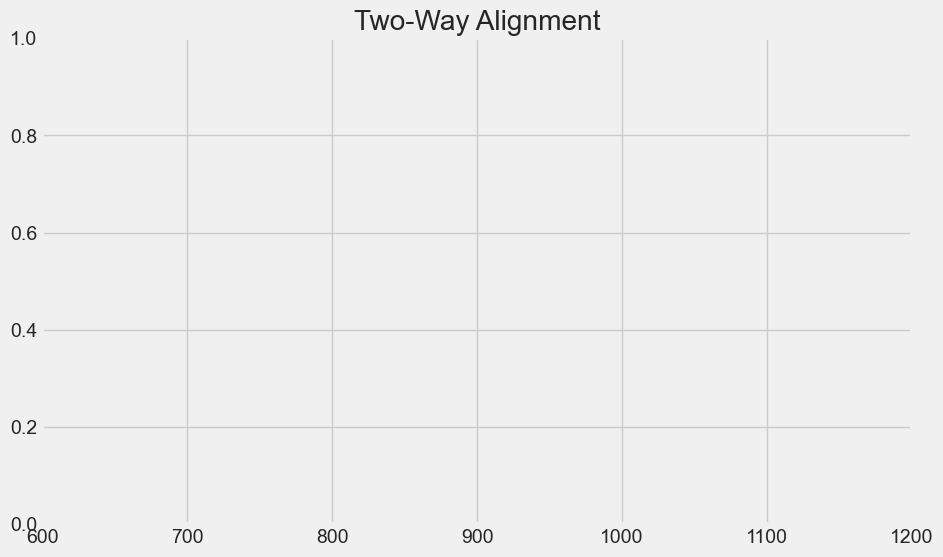

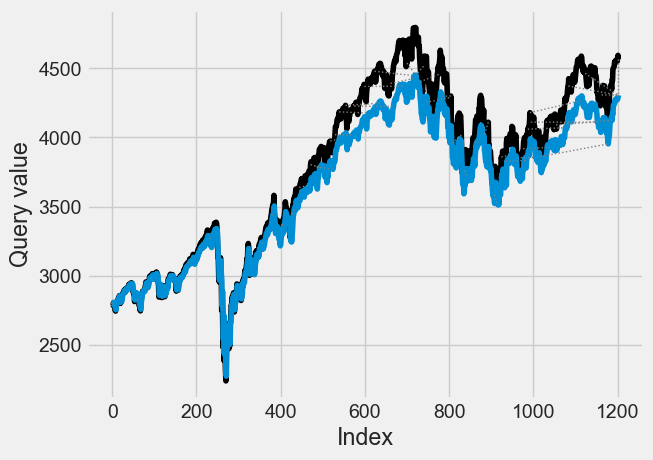

AttributeError: Line2D.set() got an unexpected keyword argument 'xlim'

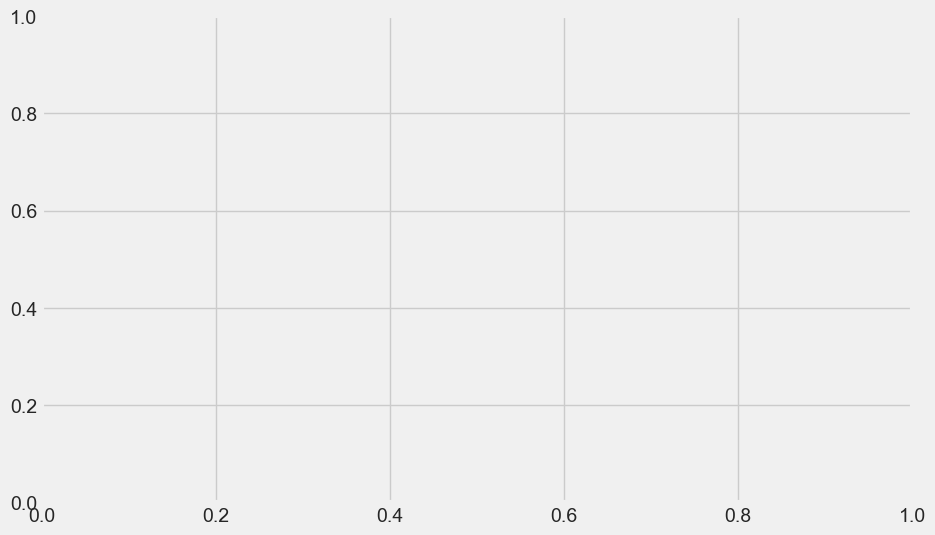

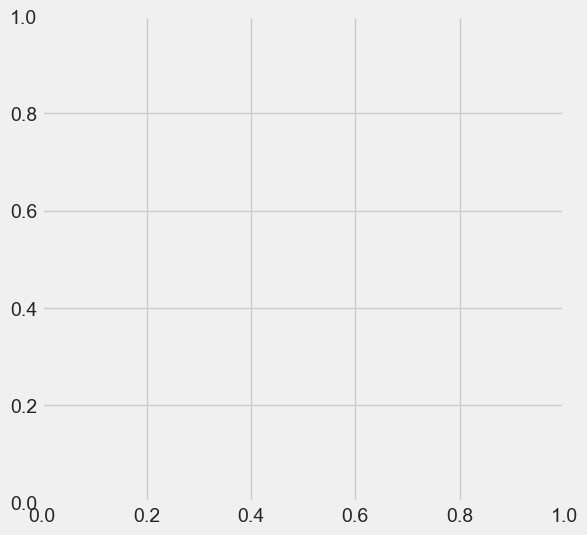

In [17]:
get_dtw(dtw_frame['Close'], dtw_frame['Predictions'])

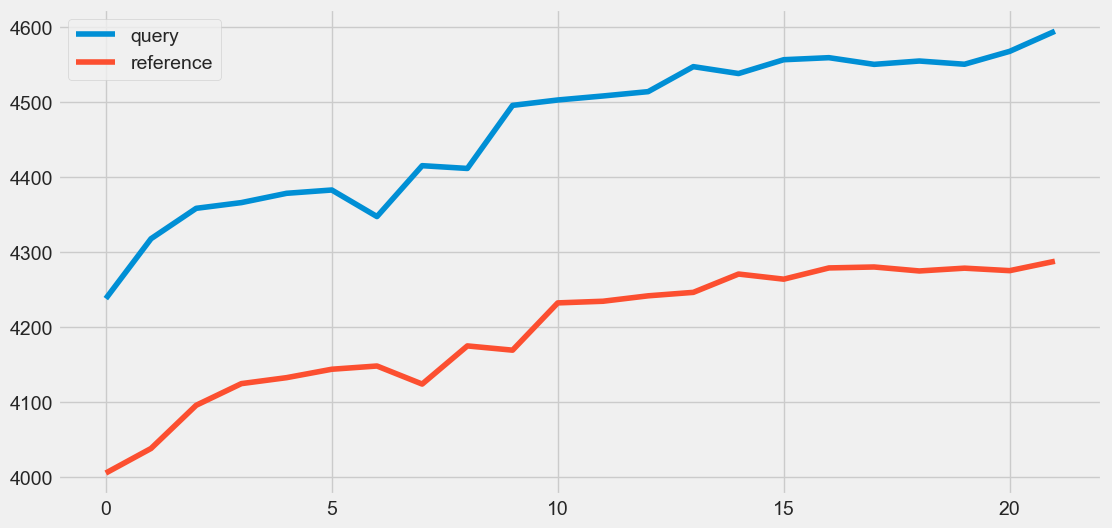

----------
[minimum distance]: 5507.86376953125	[normalized distance]: 125.17872203480114


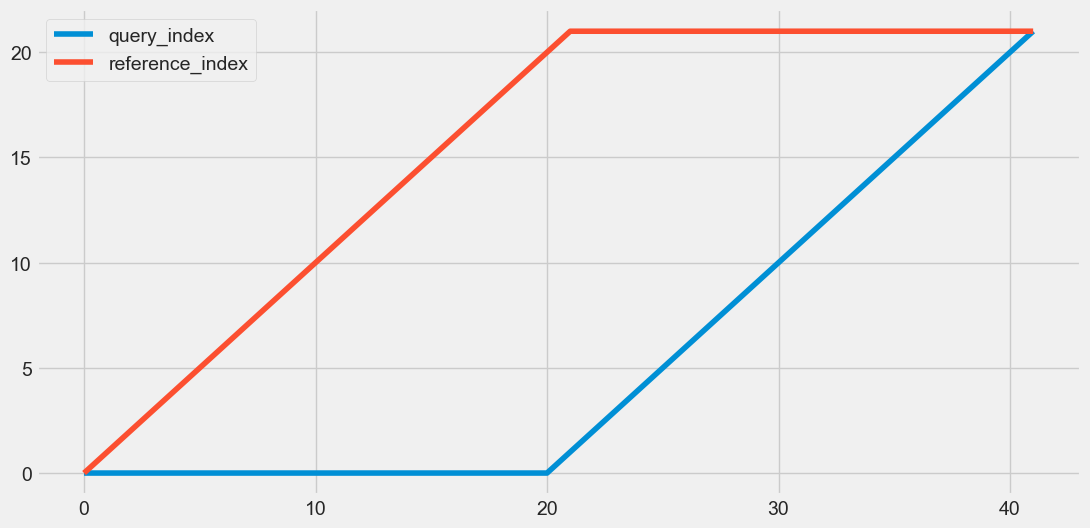

----------


AttributeError: Line2D.set() got an unexpected keyword argument 'xlim'

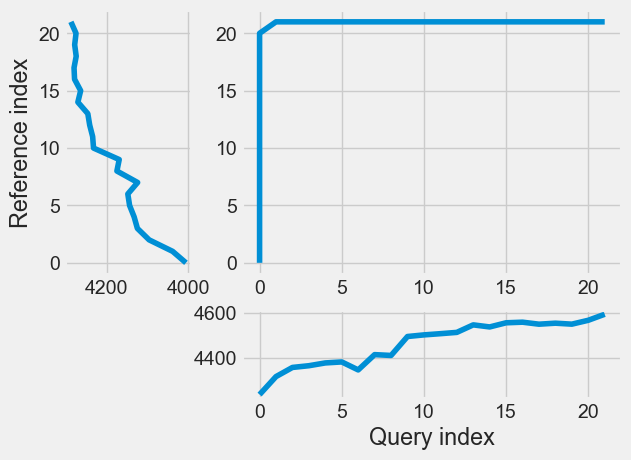

<Figure size 1200x600 with 0 Axes>

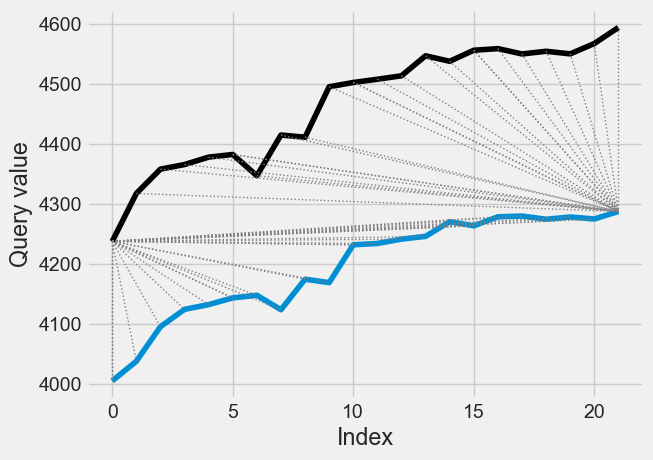

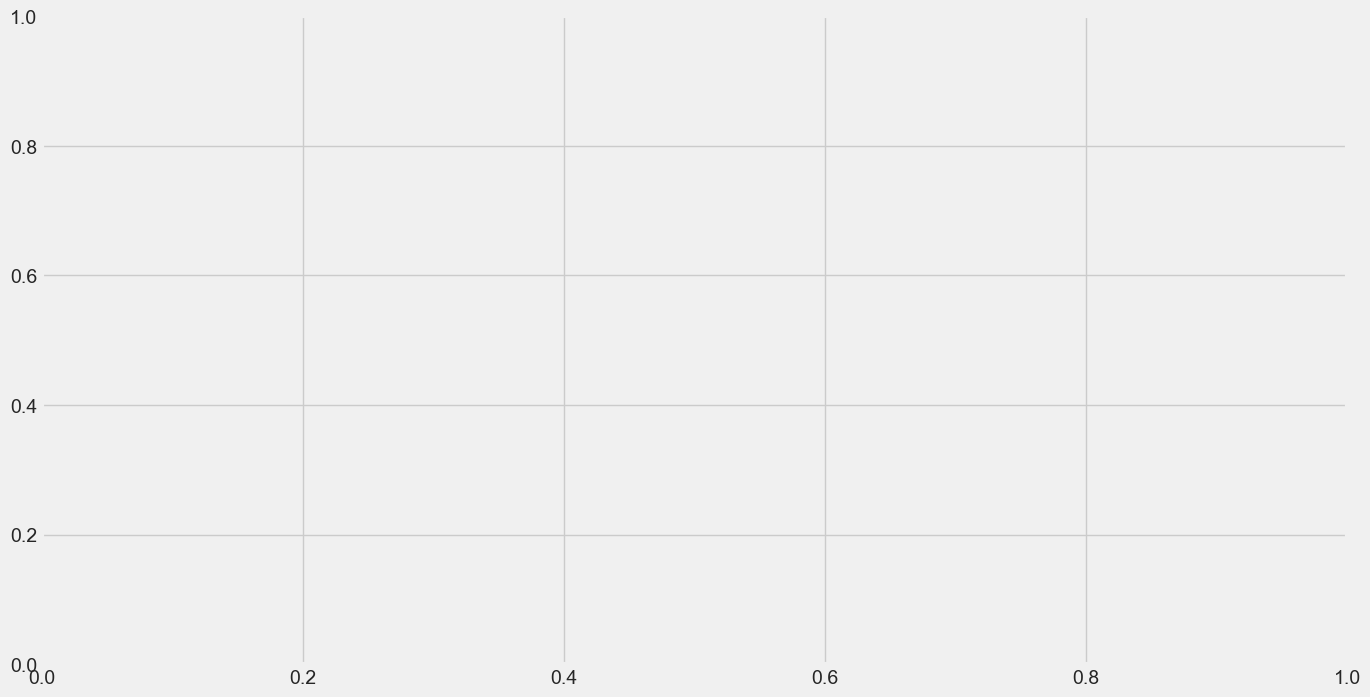

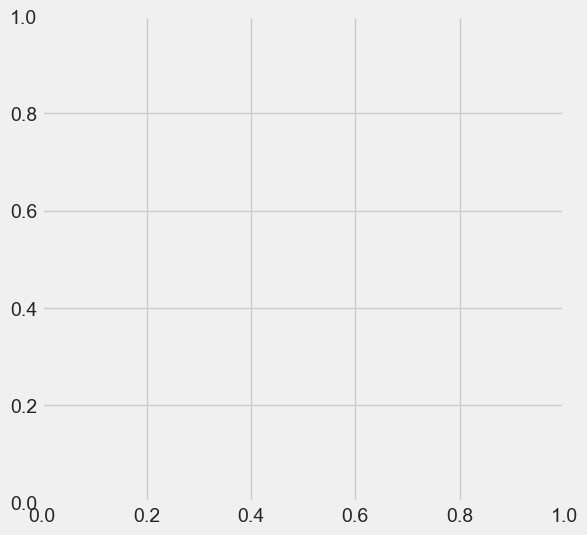

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtw import *

def get_dtw(query, reference, zoom_start=600, zoom_end=1200, verbose=True):
    # Increase the figure size for better visibility
    fig = plt.figure(figsize=(12, 6))
    plt.plot(query)
    plt.plot(reference)
    plt.legend(['query', 'reference'])
    plt.show()

    print('-'*10)

    al = dtw(query, reference, keep_internals=True)
    print('[minimum distance]: {0}\t[normalized distance]: {1}'.format(al.distance, al.normalizedDistance))

    # Increase the figure size for better visibility
    fig = plt.figure(figsize=(12, 6))
    plt.plot(al.index1)
    plt.plot(al.index2)
    plt.legend(['query_index', 'reference_index'])
    plt.show()
    print('-'*10)

    al.plot(type='threeway')

    # Increase the figure size for better visibility
    fig = plt.figure(figsize=(12, 6))
    al.plot(type='twoway', xts=query.reset_index(drop=True), yts=reference.reset_index(drop=True))

    # Zoom in on the 4th plot from index 600 to 1200
    # Increase the figure size for better visibility
    fig, ax = plt.subplots(figsize=(15, 8))
    al.plot(type='alignment', xlim=(zoom_start, zoom_end), ax=ax)
    plt.show()

    print('='*10)

# Assuming 'dtw_frame' DataFrame with 'Date', 'Close', 'Predictions', and 'DTW_score' columns
start_date = '2023-11-01'
end_date = '2023-12-01'

filtered_dtw_frame = dtw_frame[(dtw_frame['Date'] >= start_date) & (dtw_frame['Date'] <= end_date)].reset_index(drop=True)

get_dtw(filtered_dtw_frame['Close'], filtered_dtw_frame['Predictions'])
